In [1]:
#%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# Font which got unicode math stuff.
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Much more readable plots
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Make NaNs black in my fav. colormaps:
mpl.cm.Spectral.set_bad(color=(0,0,0), alpha=1)
mpl.cm.Spectral_r.set_bad(color=(0,0,0), alpha=1)

# Much better than plt.subplots()
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
import numpy as np
import json
import sys

In [3]:
import lbtoolbox.plotting as lbplt

In [11]:
sys.path.append('..')

In [23]:
import maps
import importlib ; importlib.reload(maps)

<module 'maps' from '../maps/__init__.py'>

# 7.22

Radiant T2 tower was moved to the left.

## Checking generated class

In [24]:
map722 = maps.get_map_722()

In [265]:
Xt = np.loadtxt('towers-7.22.txt')

<IPython.core.display.Javascript object>


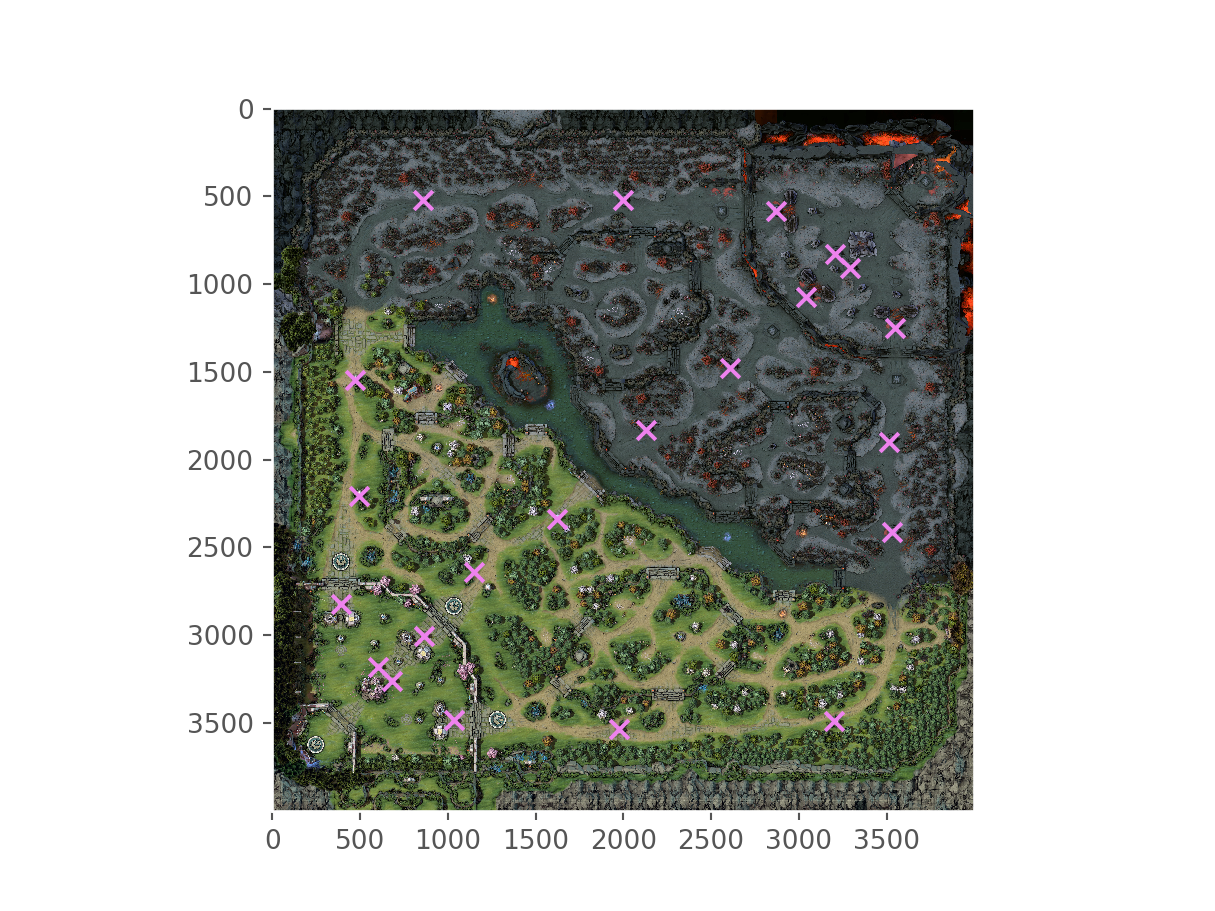

In [266]:
lbplt.imshow_raw(map722.img)
plt.scatter(*map722.cv2pix(Xt[:,:3], Xt[:,3:6]).T, s=50, linewidths=1, marker='x', c='violet')

In [144]:
demson = [json.loads(line) for line in open('deathmap/4986461644_player_positions.log').readlines()]

In [145]:
X0 = np.array([d['pos'][:2] for d in demson if d['player'] == 0])
C0 = np.array([d['pos_c'][:2] for d in demson if d['player'] == 0])
V0 = np.array([d['pos_v'][:2] for d in demson if d['player'] == 0])

In [195]:
X = np.array([d['pos'][:2] for d in demson])
C = np.array([d['pos_c'][:2] for d in demson])
V = np.array([d['pos_v'][:2] for d in demson])

In [196]:
np.min(C, axis=0), np.max(C, axis=0)

(array([70, 74]), array([184, 182]))

In [197]:
np.min(V, axis=0), np.max(V, axis=0)

(array([0., 0.]), array([255.96875, 255.96875]))

In [224]:
32768 - 16384

16384

<IPython.core.display.Javascript object>


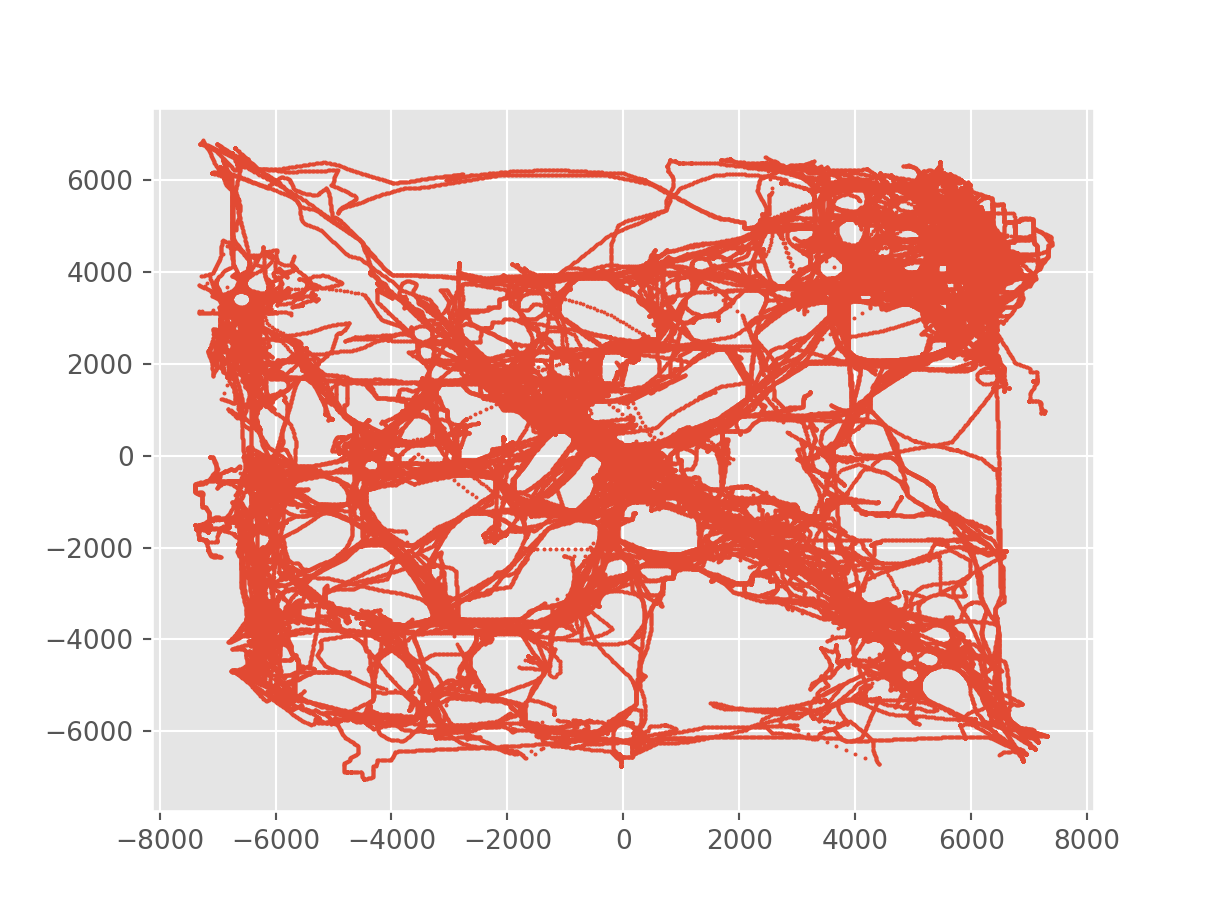

In [223]:
plt.scatter(*(C*[128, -128] + V*[1, -1] + [0, 32768] - 16384).T, s=1)

In [220]:
C*[128, -128] + V + [0, 32768] - 16384

array([[-6700.     ,  7123.96875],
       [-6750.     ,  6761.96874],
       [-6700.     ,  7123.96875],
       ...,
       [ 6950.     , -6300.03126],
       [ 4340.96875, -4472.1875 ],
       [ 7300.     , -5676.03125]])

In [242]:
map722.H

array([[ 2.42564274e-01, -1.28448914e-03,  1.99494810e+03],
       [ 2.60360330e-03,  2.44389884e-01,  1.98725693e+03],
       [ 1.22967342e-06, -5.10200844e-08,  1.00000000e+00]])

In [248]:
4096*2

8192

<IPython.core.display.Javascript object>


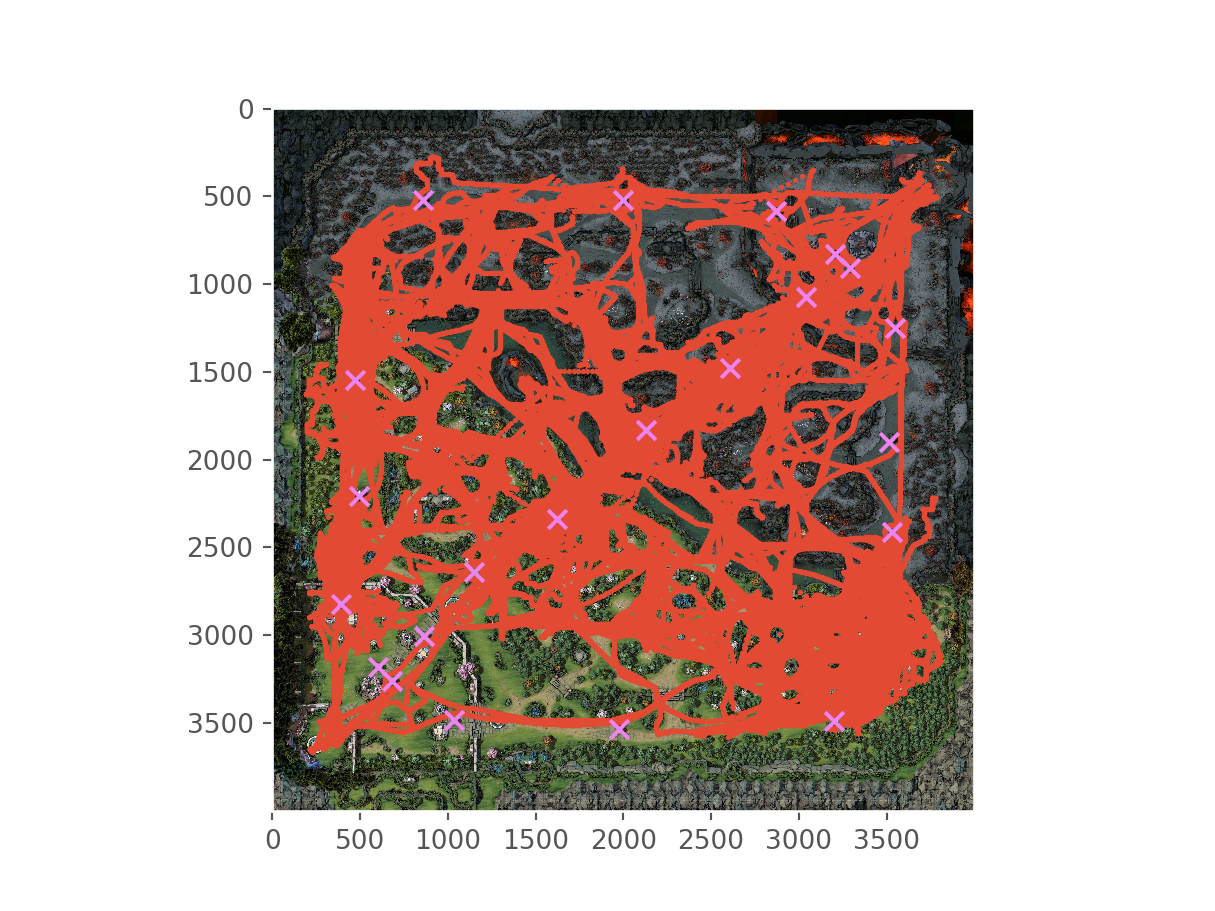

In [256]:
lbplt.imshow_raw(map722.img)

def tx(c, v):
    img_hw = np.array([4000, 4000])
    xy_world = c*[128, -128] + v*[1, -1] + [-16384, 16384]
    return (xy_world/8192 + [0.0, -0.004]) * img_hw/2 + img_hw/2

plt.scatter(*tx(C, V).T, s=1, linewidths=1)
plt.scatter(*tx(Xt[:,:2], Xt[:,3:5]).T, s=50, linewidths=1, marker='x', c='violet')

#plt.scatter(*utils.cv2pix(map722.H, C, V).T, s=1, linewidths=1)
#plt.scatter(*(utils.cv2pix(map722.H, Xt[:,:2], Xt[:,3:5])).T, s=50, linewidths=1, marker='x', c='violet')
#plt.scatter(*(utils.transform(map722.H, (Xt[:,:2]*[128, -128] + Xt[:,3:5]*[1, -1] + [0, 32768] - 16384)*[1.015, 1.0015] + [75, 50])).T, s=50, linewidths=1, marker='x', c='violet')

In [183]:
TOWER_CV = np.array([
    [ 96,  80, 130, 144.000000,  32.000000, 127.968742],  # Rad Bot T3
    [ 90,  94, 130, 224.000000, 208.000000, 128.000000],  # Rad Mid T3
    [ 76, 100, 130,  64.000000, 176.000000, 128.000000],  # Rad Top T3
    [126,  78, 130, 152.000000,  80.000000,   0.000000],  # Rad Bot T2
    [166,  80, 130,  60.000000,  16.000000,   0.000000],  # Rad Bot T1
    # [100, 106, 130, 111.968742, 159.968750,   0.000000],  # Rad Mid T2  (this is 722 position)
    [ 78, 120, 130, 240.000000, 152.000000,   0.000000],  # Rad Top T2
    [ 78, 142, 130, 144.000000,  24.000000,   0.000000],  # Rad Top T1
    [ 82,  90, 130, 176.000000,   0.000000, 127.968742],  # Rad Top T4
    [166, 164, 130,  79.968742, 168.000000, 127.968742],  # Dir Top T4
    [128, 174, 130,   0.000000, 128.000000,   0.000000],  # Dir Top T2
    [ 90, 174, 130, 191.968750, 128.000000,   0.000000],  # Dir Top T1
    [146, 144, 130, 192.000000,  63.968750,   0.000000],  # Dir Mid T2
    [132, 132, 130,  11.968750, 139.968750,   0.000000],  # Dir Mid T1
    [176, 130, 130,  64.000000, 127.968742,   0.000000],  # Dir Bot T2
    [176, 150, 130, 192.000000, 215.968750, 127.968742],  # Dir Bot T3
    [154, 172, 130, 223.968750, 144.000000, 128.000000],  # Dir Top T3
    [160, 156, 130, 176.000000, 175.000000, 128.000000],  # Dir Mid T3
    [168, 162, 130, 159.968750,  79.968742, 127.968742],  # Dir Bot T4
    [ 84,  86, 130, 240.000000, 184.000000, 127.968742],  # Rad Bot T4
    [114, 116, 128, 248.000000, 128.000000, 255.968750],  # Rad Mid T1
    [176, 114, 130, 125.312500,  63.250000,   0.000000],  # Dir Bot T1
])

# TODO: TOWER_PIXELS.
# Hand-annotated on the above image.
# X goes left->right, Y goes top->bottom
TOWER_PIXELS = np.array([
    [1033, 3488],  # Rad Bot T3
    [ 868, 3000],  # Rad Mid T3
    [ 390, 2820],  # Rad Top T3
    [1975, 3540],  # Rad Bot T2
    [3208, 3493],  # Rad Bot T1
    # [1228, 2727],  # Rad Mid T2  (this is 720-721 position)
    [ 497, 2195],  # Rad Top T2
    [ 474, 1538],  # Rad Top T1
    [ 605, 3181],  # Rad Top T4
    [3208,  822],  # Dir Top T4
    [2000,  525],  # Dir Top T2
    [ 857,  524],  # Dir Top T1
    [2610, 1470],  # Dir Mid T2
    [2130, 1823],  # Dir Mid T1
    [3223, 1890],  # Dir Bot T2
    [3552, 1245],  # Dir Bot T3
    [2866,  582],  # Dir Top T3
    [3045, 1070],  # Dir Mid T3
    [3290,  906],  # Dir Bot T4
    [ 684, 3260],  # Rad Bot T4
    [1624, 2329],  # Rad Mid T1
    [3539, 2409],  # Dir Bot T1
])

target = TOWER_PIXELS
origin = utils.cv2coord(TOWER_CV[:,:3], TOWER_CV[:,3:6])

N = len(target)
assert N >= 4

# This calculation is from the paper, A Plane Measuring Device
# by A. Criminisi, I. Reid, A. Zisserman.  For more details, see:
# http://www.robots.ox.ac.uk/~vgg/presentations/bmvc97/criminispaper/
A = np.zeros((N*2,9))
for i in range(N):
    x, y = origin[i]
    X, Y = target[i]
    A[2*i+0] = x, y, 1, 0, 0, 0, -x*X, -y*X, -X
    A[2*i+1] = 0, 0, 0, x, y, 1, -x*Y, -y*Y, -Y

U, s, V = np.linalg.svd(A)

if np.abs(V[-1,-1]) < 1e-10:
    raise ValueError("Points are likely extremely collinear, giving up since the result will be wrong.")

h = V[-1] / V[-1,-1]
h.reshape((3,3))

array([[ 2.42564275e-01,  1.28448879e-03,  1.99494810e+03],
       [ 2.60360463e-03, -2.44389884e-01,  1.98725693e+03],
       [ 1.22967389e-06,  5.10198547e-08,  1.00000000e+00]])

# 7.20-7.21

## Finding tower pixels

In [18]:
map720 = utils.get_map_720()

In [19]:
Xt = np.loadtxt('towers-7.22.txt')

In [100]:
C, V = Xt[:,:3], Xt[:,3:6]

In [101]:
i = -1

In [126]:
np.max(C*128 + V, axis=0), np.min(C*128 + V, axis=0)

(array([22720., 22400., 16768.]),
 array([ 9792.     , 10064.     , 16639.96875]))

<IPython.core.display.Javascript object>


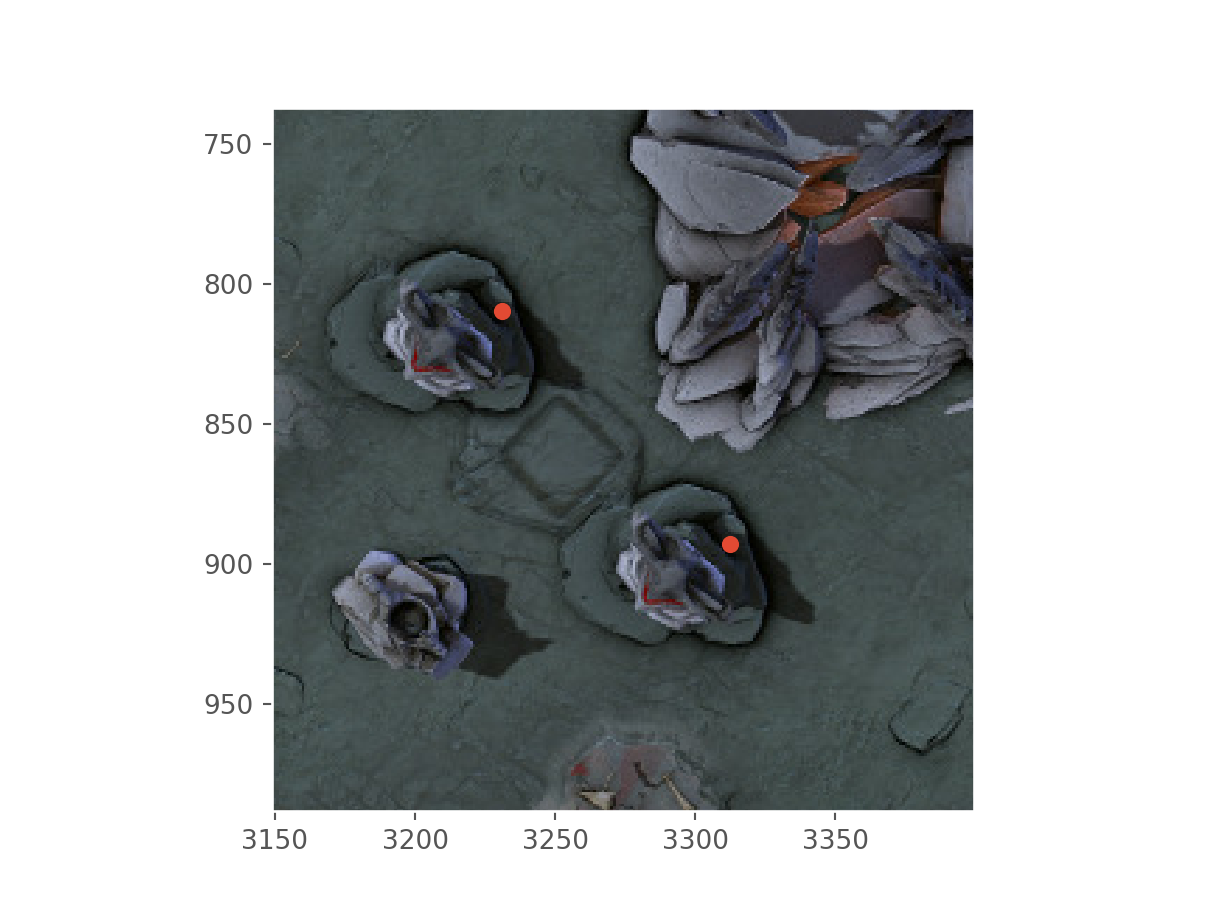

14

In [123]:
lbplt.imshow_raw(map720.img)
x, y, z = (C*128 + V - [8000, 8000, 0]).T / 16500 * 4000
plt.scatter(x, 4000-y)
i = i + 1
plt.scatter(x[i], 4000-y[i])
i

# 6.87

In [5]:
map687 = utils.get_map_687()

In [14]:
Xt = np.loadtxt('with-manta/trajectories/towers.txt')

<IPython.core.display.Javascript object>


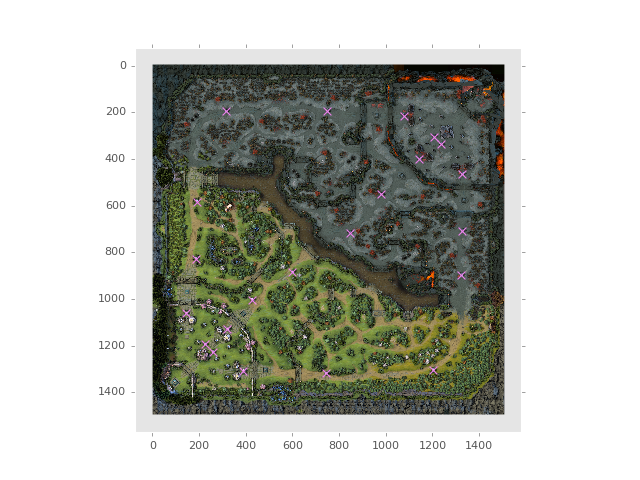

In [20]:
lbplt.imshow_raw(map687.img_small)
plt.scatter(*utils.cv2pix(map687.H_small, Xt[:,:3], Xt[:,3:6]).T, s=50, linewidths=1, marker='x', c='violet')

In [16]:
import json

In [17]:
demson = [json.loads(line) for line in open('with-manta/trajectories/2761806948.demson').readlines()]

In [18]:
X0 = np.array([d['pos'][:2] for d in demson if d['player'] == 0])
C0 = np.array([d['pos_c'][:2] for d in demson if d['player'] == 0])
V0 = np.array([d['pos_v'][:2] for d in demson if d['player'] == 0])

<IPython.core.display.Javascript object>


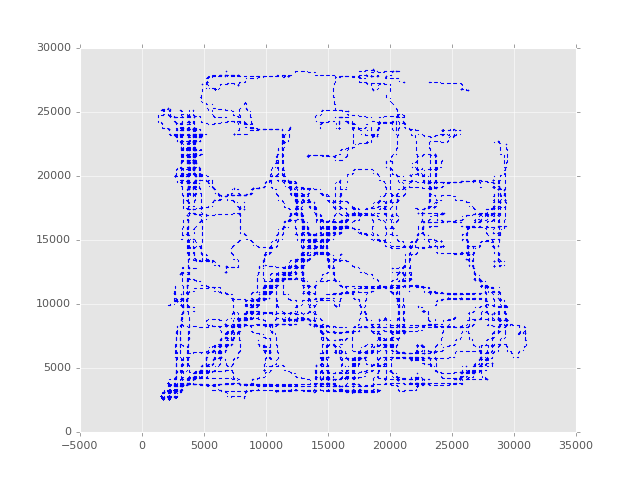

In [29]:
plt.scatter(*X0.T, s=1, linewidths=0)

<IPython.core.display.Javascript object>


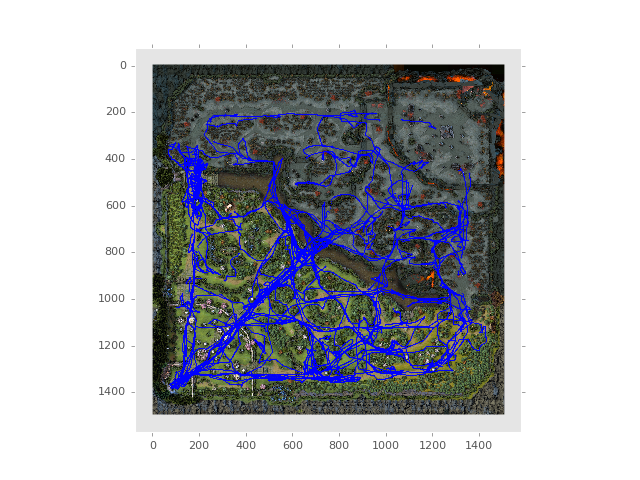

In [24]:
lbplt.imshow_raw(map687.img_small)
plt.scatter(*utils.cv2pix(map687.H_small, C0, V0).T, s=1, linewidths=0)